# **LAB 5**

# *Edge detection , corner detection and line detection*

##### Manasvi Garg 229310259

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('pexels-pixabay-56866.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
# Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)


In [6]:
# Convert to float32 before using cv2.magnitude()
prewitt_x = np.float32(cv2.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])))  
prewitt_y = np.float32(cv2.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])))  

# Compute gradient magnitude
prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)

In [5]:
# Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)

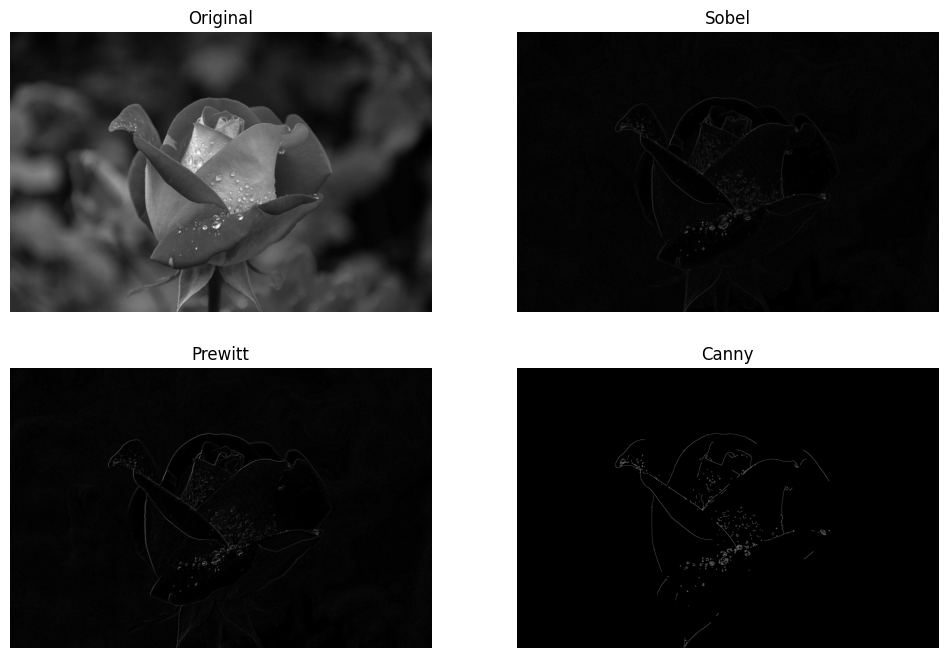

In [7]:
# Display results
titles = ["Original", "Sobel", "Prewitt", "Canny"]
images = [image, sobel_combined, prewitt_combined, canny_edges]

plt.figure(figsize=(12, 8))
for i in range(len(images)):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'image' is the input image
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray = np.float32(gray)

# Harris Corner Detection
harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

# Dilate to mark corners
harris_corners = cv2.dilate(harris_corners, None)

# Threshold and mark corners
corner_image = image.copy()
corner_image[harris_corners > 0.002 * harris_corners.max()] = [0, 0, 255]

# Display results
plt.imshow(corner_image)
plt.title("Harris Corner Detection")
plt.axis('off')
plt.show()


In [24]:
def hough_line_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    edges = cv2.Canny(img, 50, 150)
    
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)  # (rho, theta, threshold)

    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a, b = np.cos(theta), np.sin(theta)
            x0, y0 = a * rho, b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(img_color, pt1, pt2, (0, 0, 255), 2)
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title("Original Image")
    axs[1].imshow(edges, cmap='gray')
    axs[1].set_title("Canny Edge Detection")
    axs[2].imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    axs[2].set_title("Hough Line Detection")
    plt.show()

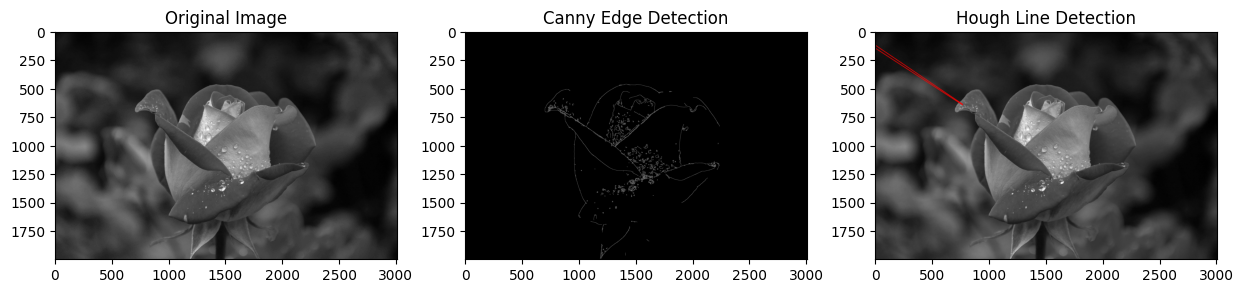

In [27]:
hough_line_detection('pexels-pixabay-56866.jpg')